In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [1]:
def Euler_method(alpha, omega, omega1, y0, y_dot0, h):
  time = np.linspace(0,20, 41)
  dt = time[1] - time[0]
  t = len(time)
  y = np.zeros(t)
  y[0] = y0
  y_dot = np.zeros(t)
  y_dot[0] = y_dot0
  y_dotdot = np.zeros(t)
  y_dotdot[0] = 1 - y0 * omega**2 - alpha * y_dot0

  for i in range(t-1):
    cst1 = 1/(1+h*alpha*dt)
    cst2 = 1/(1 + h**2 *dt**2 * omega**2 /cst1)
    y[i+1] = cst2 * ( y[i] + (1-h)* dt * y_dot[i] +
                     dt * h * y_dot[i] / cst1 +
                     h * (1-h) * y_dotdot[i] * dt**2 /cst1 
                     + h**2 * dt**2 * np.cos(omega1 * time[i+1]) )
    y_dot[i+1] = cst1 * (y_dot[i] + 
                         (1-h)*dt*y_dotdot[i] - 
                         omega**2 * h * dt * y[i+1])
    y_dotdot[i+1] = -omega**2 * y[i+1] - alpha * y_dot[i+1] + np.cos(omega1*time[i+1])
  
  return y


def RF4_method(alpha, omega, omega1, y0, y_dot0, time):
  
    t = len(time)
    dt = time[1] - time[0]

    y = np.zeros(t)
    y[0] = y0

    y_dot = np.zeros(t)
    y_dot[0] = y_dot0

    for i in range(t-1):
      f1 = y_dot[i]
      k1 = np.cos(omega1 * time[i]) - omega**2 * y[i] - alpha * y_dot[i]

      f2 = y_dot[i] + dt*k1/2
      k2 = np.cos(omega1 * (time[i] + dt/2)) - omega**2 * (y[i] + dt*f1/2) - alpha * f2

      f3 = y_dot[i] + dt*k2/2
      k3 = np.cos(omega1 * (time[i] + dt/2)) - omega**2 * (y[i] + dt*f2/2) - alpha * f3

      f4 = y_dot[i] + dt*k3/2
      k4 = np.cos(omega1 * (time[i] + dt/2)) - omega**2 * (y[i] + dt*f3/2) - alpha * f4

      y[i+1] = y[i] + dt*(f1 + 2*f2 + 2*f3 + f4)/6
      y_dot[i+1] = y_dot[i] + dt*(k1 + 2*k2 + 2*k3 + k4)/6


    return y

In [10]:
y_values = Euler_method(1,1,1, 1,0, 0.01)

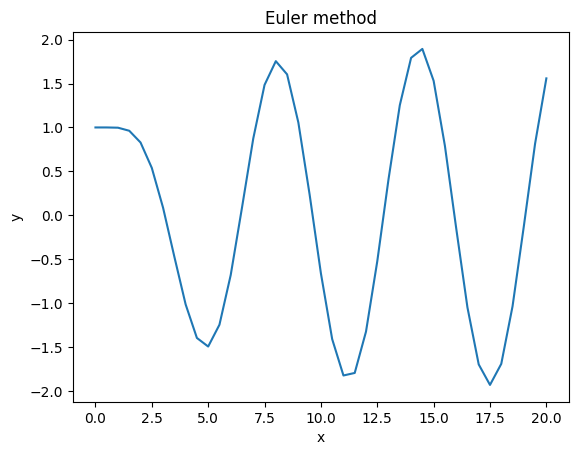

In [11]:
plt.title('Euler method')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(np.linspace(0, 20, 41), y_values)

In [4]:
time = np.linspace(0, 17.5, 41)
y_values_RF4 = RF4_method(1,1,1, 1,0, time)

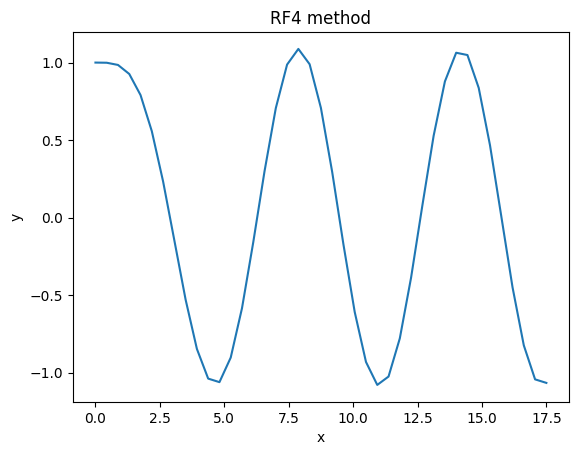

In [8]:
plt.title('RF4 method')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(time, y_values_RF4)